# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [1]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
from run_simu import run_simu, run_simu_mem, run_simu_pure
import json
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympl

basepath="C:\\Users\\WS2080-01\\OneDrive - Universita\' degli Studi della Campania Luigi Vanvitelli\\jasapaper\\"

Lets define our room and source position.

In [2]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, -1], [0, -1, 0]),
        ]

In [3]:
# Define parameters
X = 90
Y = 12
Z = 6

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(20, 6, 1)
receiver = pf.Coordinates(70, 6, 2)

In [4]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=1)

c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:84: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:101: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


(TimeData:
 (1, 1) channels with 5 samples,
 [0.3769376277923584,
  0.36119651794433594,
  0.2565031051635742,
  0.07846236228942871])

## diffuse vs custom

In [10]:
f_array = np.array([500, 1000, 2000])
airatt = np.array([2.7281341349384447, 4.664731873821475,9.88701558869792])/1000
order=30
dur=1.
step=.005
psize=2

In [ ]:
etc_diff=run_simu_pure( walls=canyon,
                        source=source,
                        receiver=receiver,
                        patch_size=psize,
                        time_step=step,
                        duration=dur,
                        refl_order=order,
                        freq=f_array,
                        att=airatt)



c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:145: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(2)
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:182: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


In [ ]:
filename = "resources\\triangle_sim_optimal.s_d.sofa"
etc_file=run_simu_pure( walls=canyon,
                        source=source,
                        receiver=receiver,
                        patch_size=psize,
                        time_step=step,
                        duration=dur,
                        refl_order=order,
                        freq=f_array,
                        att=airatt,
                        file=filename )

SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights, SampleStructuralWavelength, SampleStructuralWavelengthX, SampleStructuralWavelengthY, SampleModelScale, SampleDiameter, SampleSymmetryAzimuth, SampleSymmetryRotational, SampleStructuralDepth, SampleBaseplateHeight, SpeedOfSound


  0%|          | 0/484 [00:00<?, ?it/s]c:\Users\jotag\Documents\dev\sparapy\examples\reduce_s_d.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
  bsc_mirrored.freq[i_source, :, :] = bsc.freq[i_source_mirror,
100%|██████████| 484/484 [00:00<00:00, 1336.23it/s]


In [ ]:
pf.io.write(os.path.join(basepath,"proof_etcs.far"),compress=False,
            diffuse_etc=etc_diff,
            custom_etc=etc_file,
            freqs=f_array)

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\WS2080-01\\OneDrive - Universita' degli Studi della Campania Luigi Vanvitelli\\jasapaper\\proof_etcs.far"

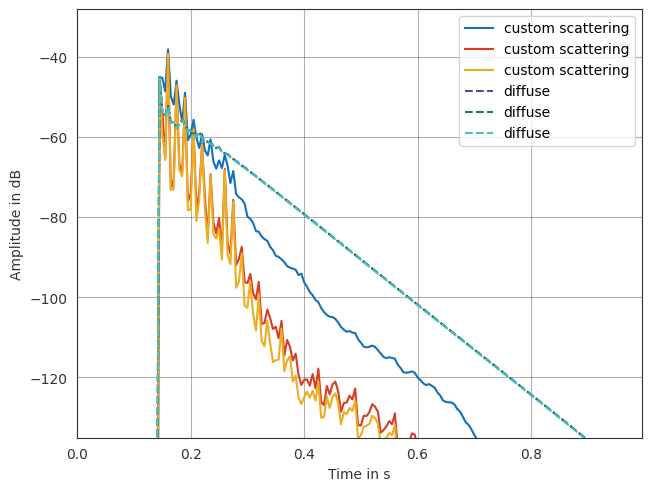

In [ ]:
pf.plot.time(etc_file, dB=True, log_prefix=10,
             label="custom scattering",
             linestyle="-")
pf.plot.time(etc_diff, dB=True, log_prefix=10,
             label="diffuse",
             linestyle="--")
plt.legend()

### run simulation

In [5]:
time_steps = [1/50,1/100,1/250,1/500,1/1000]
patch_sizes = [6,3,2,1.5]
refl_orders = [1,20,40,60,80,100]
angl_res =[1,2,4,6,8,10]

In [7]:
# baseline
pss = 3
refll = 4
tss = 1/100
angg = 30

out={"baseline":{"patch_size":[],
                 "reflection_order":[],
                 "time_step":[],
                 "brdf_resolution":[]},
     "reflection_order":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "brdf_resolution":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "patch_size":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
     "time_step":{"mem":[],
                  "t":[],
                  "edc":[],
                  "data":[]},
                  }

out["baseline"]["patch_size"]=pss

out["baseline"]["reflection_order"]=refll

out["baseline"]["time_step"]=tss

out["baseline"]["brdf_resolution"]=angg

In [ ]:
# time stepping

for ts in time_steps:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg)
    out["time_step"]["edc"]=edc.time.tolist()
    out["time_step"]["t"].append(t)
out["time_step"]["data"]=time_steps

with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)


c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:84: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:101: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


In [ ]:
# reflection order

for refl in refl_orders:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg)
    out["reflection_order"]["edc"]=edc.time.tolist()
    out["reflection_order"]["t"].append(t)
out["reflection_order"]["data"]=refl_orders

with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)



In [ ]:
# angular resolution

for ang in angl_res:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang)
    out["brdf_resolution"]["edc"]=edc.time.tolist()
    out["brdf_resolution"]["t"].append(t)
out["brdf_resolution"]["data"]=angl_res

In [ ]:
with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

In [ ]:
# patch sizes

for pat in patch_sizes:
    edc,t = run_simu( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg )
    out["patch_size"]["edc"] = edc.time.tolist()
    out["patch_size"]["t"].append(t)
out["patch_size"]["data"]=patch_sizes


In [ ]:
with open(basepath+'urban_canyon_no_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

In [ ]:
# memory
for ts in time_steps:
    out["time_step"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=ts, duration=1.2,
                    refl_order=refll, res=angg))
print("ts done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)
for refl in refl_orders:
    out["reflection_order"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refl, res=angg))
print("refl done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)
for ang in angl_res:
    out["brdf_resolution"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pss,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=ang))
print("ang done")
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)


c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:21: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:37: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


In [ ]:
for pat in patch_sizes:
    out["patch_size"]["mem"].append(run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=pat,
                    time_step=tss, duration=1.2,
                    refl_order=refll, res=angg))
with open(basepath+'urban_canyon_with_mem.json', 'w') as fp:
    json.dump(out, fp,indent=2)

If the order would be increased, this would match even after 0.5s.


In [ ]:
%load_ext watermark
%watermark -v -m -iv